In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [3]:
pd.set_option('display.max_row', 1000) #affichier 100 lignes 
pd.set_option('display.max_column', 16) #affichier 15 colonnes 

In [4]:
data = pd.read_excel(r"C:\Users\amald\OneDrive\Documents\MEMOIRE_IFID\BD_finale.xlsx") #importer dataset

In [5]:
data.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


# Analyse de la forme des données

In [6]:
df = data.copy()

In [7]:
df.shape #nombres de colonnes et lignes 

(18897, 16)

In [8]:
df.dtypes #types de variables 

ID                                        int64
Rachat                                    int64
Prime                                   float64
Fréquence                                object
Date_Effet                       datetime64[ns]
Date_Echéance                    datetime64[ns]
Durée_Contrat                           float64
Réseau_Distribution                      object
Date_de_naissance                datetime64[ns]
Age_Souscription                        float64
Age_Survenance                          float64
Sexe                                     object
Status_Contrat                           object
Date_Survenance                          object
Ancienneté_Contrat_Survenance           float64
Durée_Restante_Echéance                 float64
dtype: object

In [9]:
df.dtypes.value_counts() #compter le nombre de types de variables 

float64           6
object            5
datetime64[ns]    3
int64             2
dtype: int64

In [10]:
df.isna()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18894,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

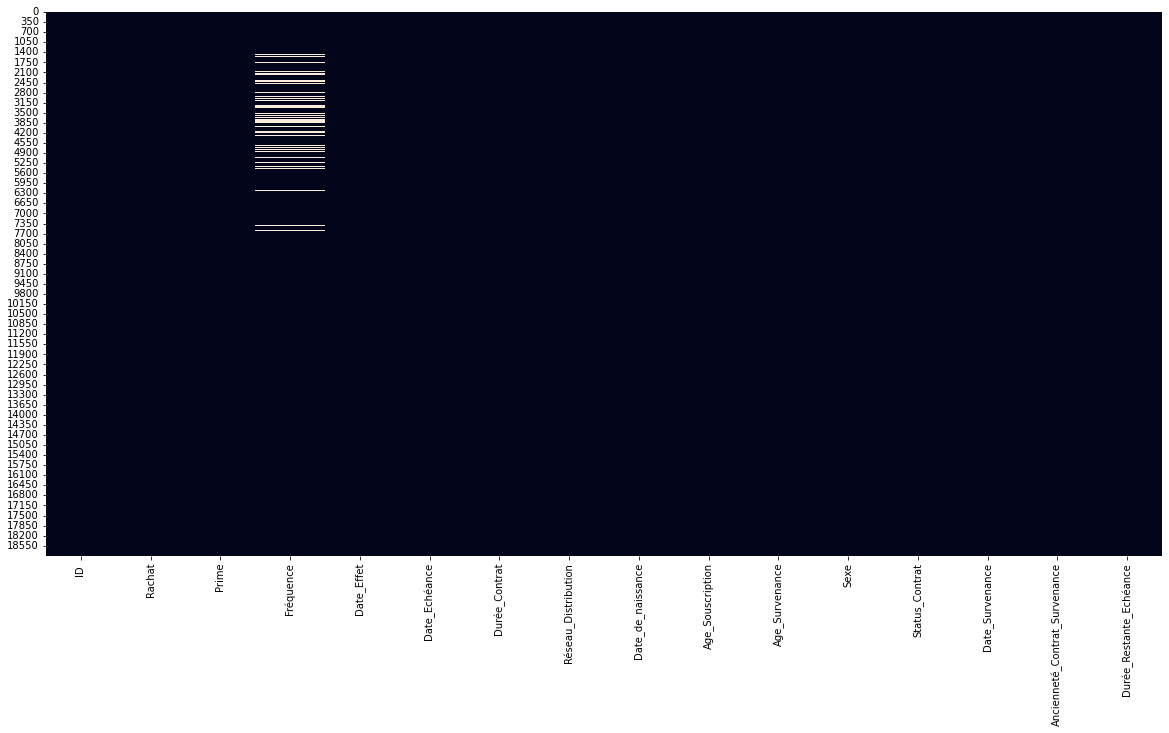

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [12]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True) #pourcentages de valeurs manquantes par variable par ordre ascendent

ID                               0.000000
Rachat                           0.000000
Prime                            0.000000
Durée_Contrat                    0.000000
Réseau_Distribution              0.000000
Sexe                             0.000000
Status_Contrat                   0.000000
Date_Survenance                  0.000000
Ancienneté_Contrat_Survenance    0.000000
Durée_Restante_Echéance          0.000000
Date_de_naissance                0.000106
Age_Survenance                   0.000106
Date_Effet                       0.000529
Date_Echéance                    0.000529
Age_Souscription                 0.000635
Fréquence                        0.054718
dtype: float64

# Analyse du Fond

## 1. Visulation initiale - Elimination des colonnes inutiles

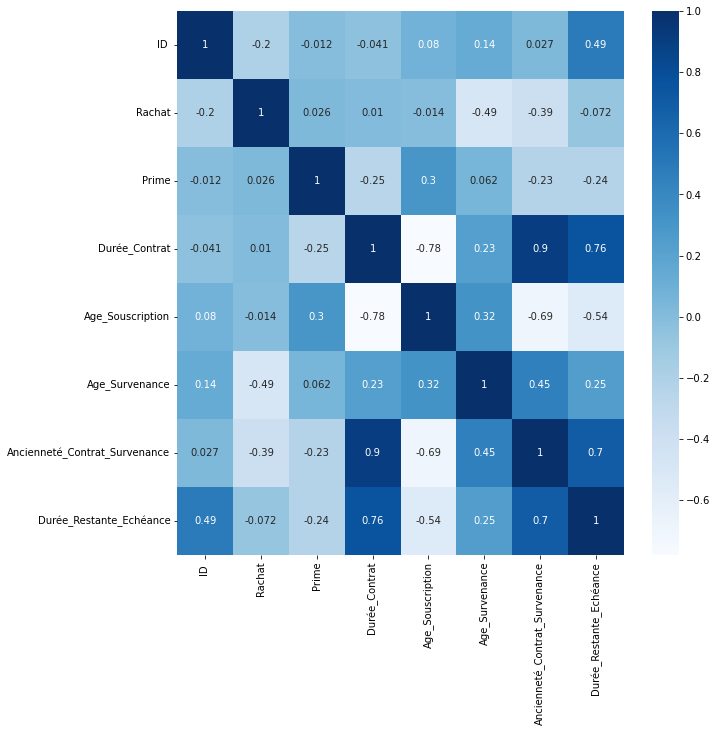

In [13]:
#Préparation des données
#Matrice de correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.savefig('matrice_correlation.png')
plt.show()

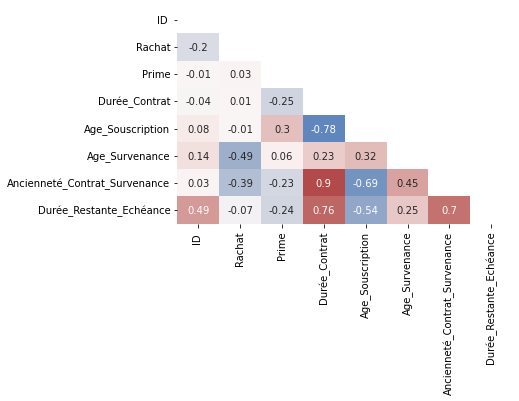

<Figure size 432x288 with 0 Axes>

In [14]:
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, cbar= False)
plt.show()
plt.savefig('matrice_correlation2.png')

On remarque une **forte correlation de 0.9 entre Durée_contrat et Ancienneté_Contrat_Survenance** et **une corrélation de 0.7 entre Durée_restante_Echéance et Ancienneté_Contrat_Survenance** .On supprimera donc les variables **Durée_Contrat** et **Durée_Restante_Echéance**.

In [15]:
df.drop("Durée_Contrat", axis=1, inplace=True)

In [16]:
df.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [17]:
df

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753
1,1715,0,5196.80,T,1992-09-03,2016-07-08,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274
2,4036,0,1496.88,A,1986-04-25,2016-03-02,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973
3,5212,0,145.50,A,1988-02-03,2015-11-11,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041
4,6026,0,2174.76,A,1986-09-09,2016-07-15,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,280200,0,952.56,T,2016-08-05,2053-12-19,Producteur,1986-01-27,30.0,67.939726,M,Encours,2053-12-19 00:00:00,37.397260
18893,280213,0,934.56,S,2016-08-15,2033-12-03,Producteur,1974-10-05,41.0,59.202740,F,Encours,2033-12-03 00:00:00,17.312329
18894,280221,0,7560.00,A,2016-08-13,2041-11-29,Agent,1976-03-21,40.0,65.736986,M,Encours,2041-11-29 00:00:00,25.312329
18895,280239,0,1134.00,S,2016-08-15,2051-02-05,Producteur,1986-07-30,30.0,64.564384,M,Encours,2051-02-05 00:00:00,34.498630


## 2. Analyse de la variable target

In [18]:
df['Rachat']

0        0
1        0
2        0
3        0
4        0
        ..
18892    0
18893    0
18894    0
18895    0
18896    0
Name: Rachat, Length: 18897, dtype: int64

In [19]:
df['Rachat'].value_counts(normalize=True)

0    0.953591
1    0.046409
Name: Rachat, dtype: float64

Seulement **4.64%** des contrats sont rachetés; contre **95.35%** qui sont soit encours soit echus. Donc on voit clairement que nos données sont **déséquilibrées**

## Histogrammes des variables continues 

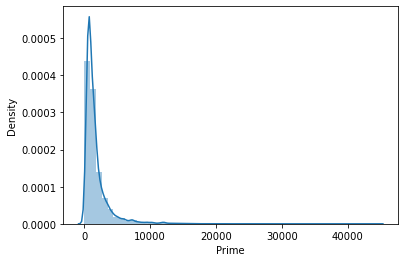

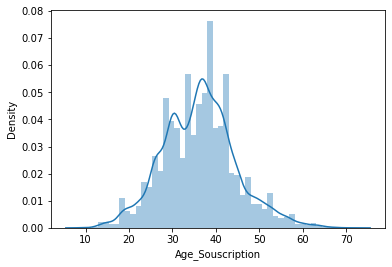

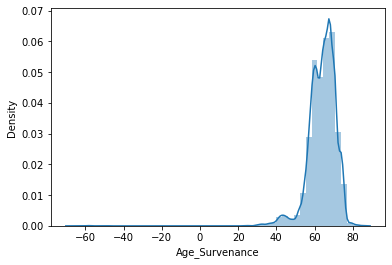

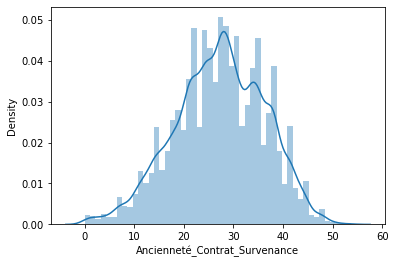

In [20]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col]) 
plt.savefig('histogramme.png')

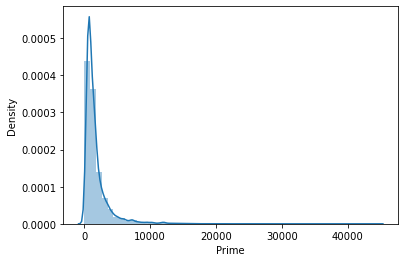

In [21]:
plt.figure()
sns.distplot(df['Prime']) 
plt.savefig('histprime.png')

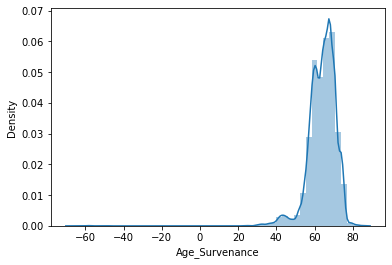

In [22]:
plt.figure()
sns.distplot(df['Age_Survenance']) 
plt.savefig('histagesurv.png')

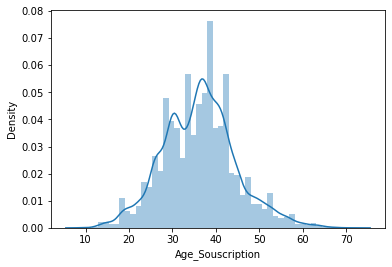

In [23]:
plt.figure()
sns.distplot(df['Age_Souscription']) 
plt.savefig('histagesous.png')

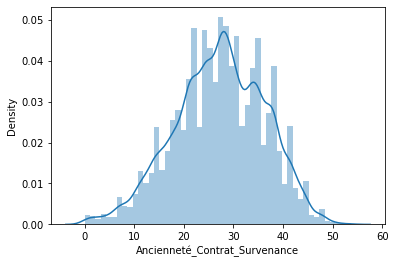

In [24]:
plt.figure()
sns.distplot(df['Ancienneté_Contrat_Survenance']) 
plt.savefig('histanciennete.png')

<AxesSubplot:xlabel='Sexe', ylabel='Rachat'>

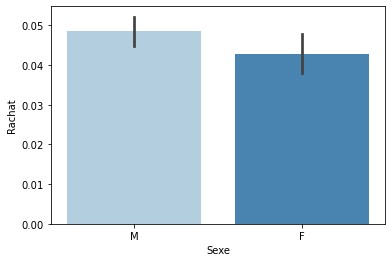

In [25]:
sns.barplot(y='Rachat',x='Sexe',data=df,palette = "Blues")

<AxesSubplot:xlabel='Fréquence', ylabel='Rachat'>

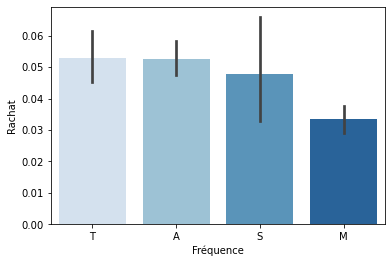

In [26]:
sns.barplot(y='Rachat',x='Fréquence',data=df ,  palette = "Blues")

<AxesSubplot:xlabel='Réseau_Distribution', ylabel='Rachat'>

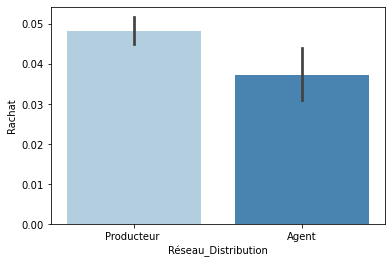

In [27]:
sns.barplot(y='Rachat',x='Réseau_Distribution',data=df  , palette = "Blues")

### variables qualitatives 

In [28]:
df['Fréquence'].unique()

array([nan, 'T', 'A', 'S', 'M'], dtype=object)

In [29]:
for col in df.select_dtypes('object'):
    print(col,df[col].unique() )

Fréquence [nan 'T' 'A' 'S' 'M']
Réseau_Distribution ['Producteur ' 'Agent']
Sexe ['M' 'F']
Status_Contrat ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


In [30]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}') #on change la forme d'affichage

Fréquence----------------------------------------- [nan 'T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']
Status_Contrat------------------------------------ ['Echu' 'RACHAT PARTIEL' 'RACHAT TOTAL' 'Encours']
Date_Survenance----------------------------------- [datetime.datetime(2016, 3, 11, 0, 0) datetime.datetime(2016, 7, 8, 0, 0)
 datetime.datetime(2016, 3, 2, 0, 0) ...
 datetime.datetime(2051, 10, 10, 0, 0)
 datetime.datetime(2048, 7, 12, 0, 0) datetime.datetime(2051, 1, 23, 0, 0)]


# Pré-traitement de données 

In [31]:
df = data.copy()
df.head()

,ID,Rachat,Prime,Fréquence,Date_Effet,Date_Echéance,Durée_Contrat,Réseau_Distribution,Date_de_naissance,Age_Souscription,Age_Survenance,Sexe,Status_Contrat,Date_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,702,0,1296.88,NaN,1992-05-05,2016-03-11,23.865753,Producteur,1958-04-19,34.0,57.934247,M,Echu,2016-03-11 00:00:00,23.865753,0.0
1,1715,0,5196.80,T,1992-09-03,2016-07-08,23.860274,Producteur,1958-03-15,34.0,58.356164,M,Echu,2016-07-08 00:00:00,23.860274,0.0
2,4036,0,1496.88,A,1986-04-25,2016-03-02,29.873973,Producteur,1953-11-11,32.0,62.347945,M,Echu,2016-03-02 00:00:00,29.873973,0.0
3,5212,0,145.50,A,1988-02-03,2015-11-11,27.789041,Producteur,1953-07-21,34.0,62.350685,F,Echu,2015-11-11 00:00:00,27.789041,0.0
4,6026,0,2174.76,A,1986-09-09,2016-07-15,29.868493,Producteur,1958-03-01,28.0,58.413699,M,Echu,2016-07-15 00:00:00,29.868493,0.0


In [32]:
df.columns


Index(['ID ', 'Rachat', 'Prime', 'Fréquence', 'Date_Effet', 'Date_Echéance',
       'Durée_Contrat', 'Réseau_Distribution', 'Date_de_naissance',
       'Age_Souscription', 'Age_Survenance', 'Sexe', 'Status_Contrat',
       'Date_Survenance', 'Ancienneté_Contrat_Survenance',
       'Durée_Restante_Echéance'],
      dtype='object')

In [33]:
data = df.drop(['ID ', 'Date_Effet','Date_Echéance', 'Date_de_naissance',
       'Status_Contrat','Date_Survenance'], axis=1) 
#Eliminer les variables non utiles 

In [34]:
data.head()


,Rachat,Prime,Fréquence,Durée_Contrat,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
0,0,1296.88,NaN,23.865753,Producteur,34.0,57.934247,M,23.865753,0.0
1,0,5196.80,T,23.860274,Producteur,34.0,58.356164,M,23.860274,0.0
2,0,1496.88,A,29.873973,Producteur,32.0,62.347945,M,29.873973,0.0
3,0,145.50,A,27.789041,Producteur,34.0,62.350685,F,27.789041,0.0
4,0,2174.76,A,29.868493,Producteur,28.0,58.413699,M,29.868493,0.0


In [35]:
data.shape

(18897, 10)

In [36]:
data = data.dropna(axis=0)
data.shape

(17855, 10)

In [37]:
data.describe()

,Rachat,Prime,Durée_Contrat,Age_Souscription,Age_Survenance,Ancienneté_Contrat_Survenance,Durée_Restante_Echéance
count,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000,17855.000000
mean,0.045029,1783.837462,27.919342,36.385438,64.050809,27.141172,20.382020
std,0.207374,2049.331000,8.347539,8.408454,6.843959,8.997640,9.042965
min,0.000000,7.400000,0.531507,9.000000,22.668493,0.030137,0.000000
25%,0.000000,720.230000,22.095890,31.000000,60.024658,21.284932,13.838356
50%,0.000000,1164.700000,27.901370,37.000000,64.945205,27.476712,20.991781
75%,0.000000,1999.140000,34.210959,41.000000,68.512329,33.605479,26.604110
max,1.000000,44487.300000,53.791781,72.000000,85.939726,53.791781,47.498630


In [38]:
data.drop("Durée_Contrat", axis=1, inplace=True)

In [39]:
data.drop("Durée_Restante_Echéance", axis=1, inplace=True)

In [40]:
data

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,5196.80,T,Producteur,34.0,58.356164,M,23.860274
2,0,1496.88,A,Producteur,32.0,62.347945,M,29.873973
3,0,145.50,A,Producteur,34.0,62.350685,F,27.789041
4,0,2174.76,A,Producteur,28.0,58.413699,M,29.868493
5,0,2536.38,T,Producteur,37.0,67.558904,M,29.868493
...,...,...,...,...,...,...,...,...
18892,0,952.56,T,Producteur,30.0,67.939726,M,37.397260
18893,0,934.56,S,Producteur,41.0,59.202740,F,17.312329
18894,0,7560.00,A,Agent,40.0,65.736986,M,25.312329
18895,0,1134.00,S,Producteur,30.0,64.564384,M,34.498630


In [41]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}') 

Fréquence----------------------------------------- ['T' 'A' 'S' 'M']
Réseau_Distribution------------------------------- ['Producteur ' 'Agent']
Sexe---------------------------------------------- ['M' 'F']


In [42]:
data.dropna(axis=0 , inplace = True)

In [43]:
data.shape


(17855, 8)

## Encodage Selection des variables

In [44]:
#creation d'une fontion encodage pour l'utiliser aprés sur le testset
def encodage(data):
    code = {'M':3,
            'T':2,
            'S':1,
            'A':0,
            'Producteur ':0,
            'Agent':1,
            'M':0,
            'F':1,
           }
    
    for col in data.select_dtypes('object').columns:
        data.loc[:,col] = data[col].map(code)
        
    return data

In [45]:
data = encodage(data)

## Feature Selection

In [46]:
data.columns

Index(['Rachat', 'Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance'],
      dtype='object')

<AxesSubplot:>

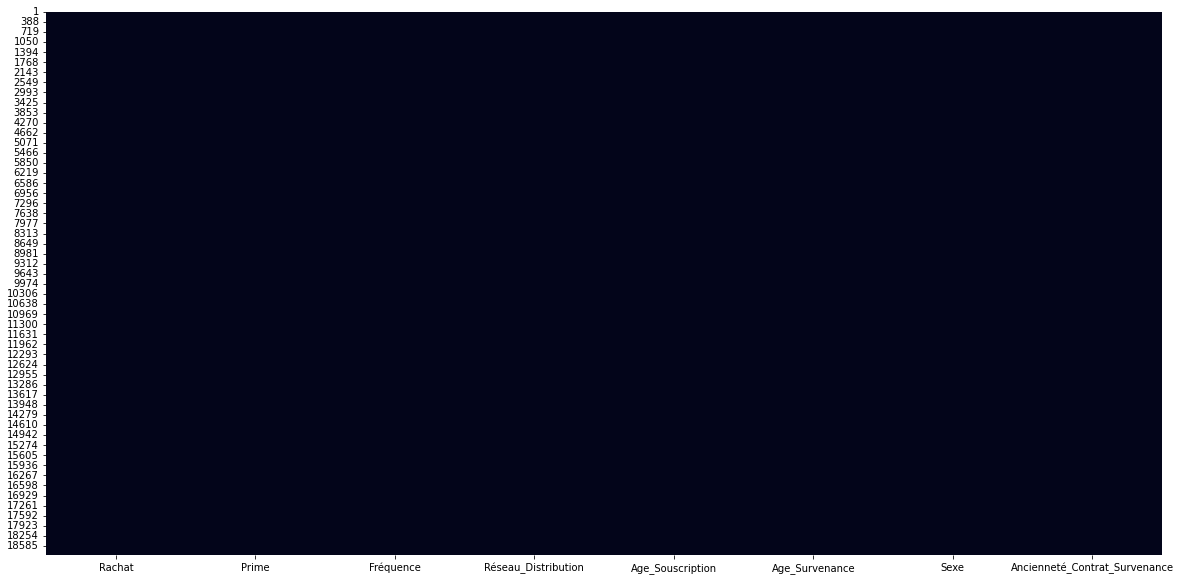

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [48]:
data.dropna(axis=0 , inplace = True)

In [49]:
data.shape

(17855, 8)

In [50]:
data.columns

Index(['Rachat', 'Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance'],
      dtype='object')

In [51]:
y=data['Rachat']
y


1        0
2        0
3        0
4        0
5        0
        ..
18892    0
18893    0
18894    0
18895    0
18896    0
Name: Rachat, Length: 17855, dtype: int64

In [52]:
var=['Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance']

X= data[var]
X 

,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,5196.80,2,0,34.0,58.356164,0,23.860274
2,1496.88,0,0,32.0,62.347945,0,29.873973
3,145.50,0,0,34.0,62.350685,1,27.789041
4,2174.76,0,0,28.0,58.413699,0,29.868493
5,2536.38,2,0,37.0,67.558904,0,29.868493
...,...,...,...,...,...,...,...
18892,952.56,2,0,30.0,67.939726,0,37.397260
18893,934.56,1,0,41.0,59.202740,1,17.312329
18894,7560.00,0,1,40.0,65.736986,0,25.312329
18895,1134.00,1,0,30.0,64.564384,0,34.498630


In [53]:
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold = (.9 * (1 - .9))) 
variance.fit(X) 
variance.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

 La fonction ci-dessous identifiera les variables qui sont les mêmes dans au moins 90% des observations. Dans notre cas, nous n’avons pas besoin de supprimer des variables

# splitting the data

In [54]:
import sklearn
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

## REGRESSION LOGISTIQUE

Pour la régression logistique, il faut qu'on procéde au scaling avant d'appliquer l'algorithme

In [55]:
from sklearn.preprocessing import MinMaxScaler
data_lr=data.copy()
# Scale only columns that have values greater than 1
to_scale = ['Prime', 'Fréquence', 'Réseau_Distribution',
       'Age_Souscription', 'Age_Survenance', 'Sexe',
       'Ancienneté_Contrat_Survenance']
mms = MinMaxScaler()
scaled = mms.fit_transform(data_lr[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    data_lr[col] = scaled[col]
    
data_lr.head()

,Rachat,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0,0.033487,0.0,0.0,0.365079,0.627133,0.0,0.555114
2,0,0.003105,0.0,0.0,0.396825,0.627176,1.0,0.516333
3,0,0.048727,0.0,0.0,0.301587,0.564952,0.0,0.555012
4,0,0.056857,1.0,0.0,0.444444,0.709492,0.0,0.555012
5,0,0.045724,1.0,0.0,0.460317,0.691262,0.0,0.523926


In [56]:
data_lr.dropna(axis=0 , inplace = True)

In [57]:
X_lr= data_lr.drop('Rachat', axis=1)

In [58]:
X_lr

,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
1,0.033487,0.0,0.0,0.365079,0.627133,0.0,0.555114
2,0.003105,0.0,0.0,0.396825,0.627176,1.0,0.516333
3,0.048727,0.0,0.0,0.301587,0.564952,0.0,0.555012
4,0.056857,1.0,0.0,0.444444,0.709492,0.0,0.555012
5,0.045724,1.0,0.0,0.460317,0.691262,0.0,0.523926
...,...,...,...,...,...,...,...
17850,0.021249,1.0,0.0,0.333333,0.715511,0.0,0.695052
17851,0.020844,0.5,0.0,0.507937,0.577423,1.0,0.321460
17852,0.169798,0.0,1.0,0.492063,0.680696,0.0,0.470264
17853,0.025328,0.5,0.0,0.333333,0.662163,0.0,0.641135


In [59]:
y_lr= data_lr['Rachat']
y_lr

1        0
2        0
3        0
4        0
5        0
        ..
17850    0
17851    0
17852    0
17853    0
17854    0
Name: Rachat, Length: 16813, dtype: int64

In [60]:
X_train_lr,X_test_lr,y_train_lr,y_test_lr  = train_test_split(X_lr,
                                              y_lr,
                                              test_size=0.3,
                                              random_state = 30)

In [61]:
X_train_lr

,Prime,Fréquence,Réseau_Distribution,Age_Souscription,Age_Survenance,Sexe,Ancienneté_Contrat_Survenance
16536,0.080769,0.0,0.0,0.460317,0.505499,0.0,0.290985
6821,0.008170,0.5,0.0,0.587302,0.662553,0.0,0.330021
9464,0.018567,0.0,1.0,0.492063,0.599333,1.0,0.375121
6530,0.012335,1.0,0.0,0.396825,0.717892,0.0,0.624166
512,0.009816,1.0,0.0,0.587302,0.762666,0.0,0.458645
...,...,...,...,...,...,...,...
557,0.016969,0.0,1.0,0.412698,0.583052,0.0,0.445396
13116,0.058530,1.0,0.0,0.619048,0.764614,0.0,0.413953
16318,0.080769,0.0,0.0,0.444444,0.717069,0.0,0.559700
5329,0.014632,0.0,1.0,0.333333,0.716939,0.0,0.689650


In [62]:
model_lr=LogisticRegression()
model_lr.fit(X_train_lr, y_train_lr)
pred_lr= model_lr.predict(X_test_lr)

In [63]:
# Evaluate
print(confusion_matrix(y_test_lr, pred_lr))
print(classification_report(y_test_lr, pred_lr))


[[4790    1]
 [ 252    1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4791
           1       0.50      0.00      0.01       253

    accuracy                           0.95      5044
   macro avg       0.73      0.50      0.49      5044
weighted avg       0.93      0.95      0.93      5044



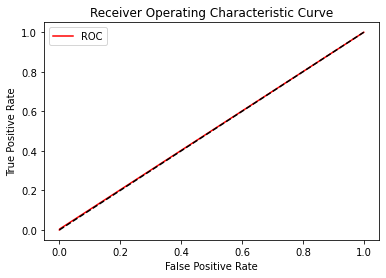

In [64]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
#pred = model_lr.predict(X_test)  
fper, tper, thresholds = roc_curve(y_test_lr, pred_lr)
plot_roc_curve(fper, tper)

**Le modèle de régression logistique est précis à 95 %**, alors où est le problème ? Oui, il peut classer correctement presque toutes les contrats non rachetés. Mais il a également **classé 100% des contrats rachetés comme non rachetés**. En un mot, le modèle est inutilisable. Le déséquilibre des classes a tué sa performance. **SMOTE** peut nous aider.

**SMOTE**

In [65]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [66]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X_train_lr_sm, y_train_lr_sm =sm.fit_resample(X_train_lr, y_train_lr)


In [67]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model1 = LogisticRegression()

params = {
    'penalty'      : ['none', 'l1', 'l2', 'elasticnet'],
    'C'            : [0.001, 0.005, 0.01, 0.25, 0.5, 0.75, 0.9, 1, 1.01, 1.05, 1.1, 1.15, 1.2],
    'solver'       : ['newton-cg', 'lbfgs', 'liblinear'],
    'fit_intercept': [True, False]
}
search = GridSearchCV(model1, params, scoring='accuracy', n_jobs=-1, cv=3)
result = search.fit(X_train_lr_sm, y_train_lr_sm)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.63144061402893
Best Hyperparameters: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [68]:
model_lr_sm=LogisticRegression(C= 0.01, fit_intercept=True, penalty='l1', solver='liblinear')
model_lr_sm.fit(X_train_lr_sm, y_train_lr_sm)
pred_lr_sm= model_lr_sm.predict(X_test_lr)

# Evaluate
print(confusion_matrix(y_test_lr, pred_lr_sm))
print(classification_report(y_test_lr, pred_lr_sm))


[[3403 1388]
 [ 122  131]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      4791
           1       0.09      0.52      0.15       253

    accuracy                           0.70      5044
   macro avg       0.53      0.61      0.48      5044
weighted avg       0.92      0.70      0.78      5044



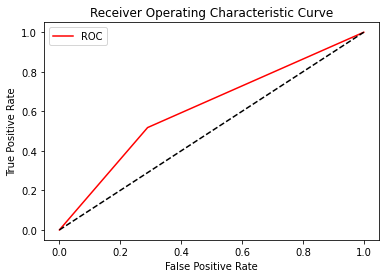

In [69]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()  
fper, tper, thresholds = roc_curve(y_test_lr, pred_lr_sm)
plot_roc_curve(fper, tper)

On constate qu'après le smote la précision du modèle 1 a diminué mais son **Rappel est passé de 0% à 53%**.

In [70]:
from sklearn import metrics
auc1 = metrics.roc_auc_score(y_test_lr,pred_lr)
auc2 = metrics.roc_auc_score(y_test_lr,pred_lr_sm)

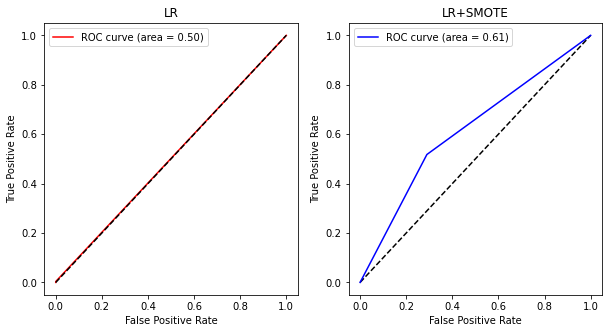

In [71]:
import matplotlib.pyplot as plt
plt.figure (figsize= (10, 5)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(1, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='red', label="ROC curve (area = %0.2f)" % auc1)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LR')
    plt.legend()
    #plt.show()
#pred2_sm = model2_sm.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test_lr, pred_lr)
plot_roc_curve(fper, tper)

plt.subplot(1, 2, 2)
# Modify right plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (area = %0.2f)" % auc2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('LR+SMOTE')
    plt.legend()
    #plt.show()
#pred2_sm = model2_enn.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test_lr, pred_lr_sm)
plot_roc_curve(fper, tper)

plt.show()

## ARBRE DE DECISION

In [72]:
# Splitting Train and Test Data
X_train,X_test,y_train,y_test  = train_test_split(X,
                                              y,
                                              test_size=0.3,
                                              random_state = 42)


In [73]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
pred_dt = DT.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

[[5051   48]
 [  82  176]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5099
           1       0.79      0.68      0.73       258

    accuracy                           0.98      5357
   macro avg       0.88      0.84      0.86      5357
weighted avg       0.97      0.98      0.97      5357



on cherche les meilleurs paramétres avec grid search et on reexcute l'algorithme sur le data resampled avec SMOT

**SMOTE**

In [74]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE()
X_train_sm, y_train_sm =smote.fit_resample(X_train, y_train)


In [75]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [20,30,40,50,60,70,80,90,100,],
    'max_depth'            : [3,4,5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='accuracy', n_jobs=-1, cv=3)
CV_model2 = search.fit(X_train_sm, y_train_sm)

# summarize result
print('Best Score: %s' % CV_model2.best_score_)
print('Best Hyperparameters: %s' % CV_model2.best_params_)

Best Score: 0.9512215528781794
Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [76]:
DT_sm = DecisionTreeClassifier(max_depth= 8,min_samples_leaf= 30, min_samples_split= 20)
DT_sm.fit(X_train_sm, y_train_sm)
pred_dt_sm = DT_sm.predict(X_test)
# Evaluate
print(confusion_matrix(y_test, pred_dt_sm))
print(classification_report(y_test, pred_dt_sm))

[[4864  235]
 [  42  216]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      5099
           1       0.48      0.84      0.61       258

    accuracy                           0.95      5357
   macro avg       0.74      0.90      0.79      5357
weighted avg       0.97      0.95      0.95      5357



**SMOTEENN**

In [77]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [78]:
sm_enn=SMOTEENN()
X_train_enn, y_train_enn =sm_enn.fit_resample(X_train, y_train)

In [79]:
# Define feature selection method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model2 = DecisionTreeClassifier()

params = {
    'min_samples_split'      : [20,30,40,50,60,70,80,90,100],
    'max_depth'            : [3,4,5,6,7,8],
    'min_samples_leaf'       : [30,50,75,100],
}
search = GridSearchCV(model2, params, scoring='accuracy', n_jobs=-1, cv=3)
CV_enn = search.fit(X_train_enn, y_train_enn)

# summarize result
print('Best Score: %s' % CV_enn.best_score_)
print('Best Hyperparameters: %s' % CV_enn.best_params_)

Best Score: 0.9628524361972489
Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [80]:
DT_enn = DecisionTreeClassifier(max_depth=7 ,min_samples_leaf= 30, min_samples_split= 100)
DT_enn.fit(X_train_enn, y_train_enn)
pred_dt_enn= DT_enn.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_dt_enn))
print(classification_report(y_test, pred_dt_enn))


[[4780  319]
 [  29  229]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      5099
           1       0.42      0.89      0.57       258

    accuracy                           0.94      5357
   macro avg       0.71      0.91      0.77      5357
weighted avg       0.97      0.94      0.95      5357



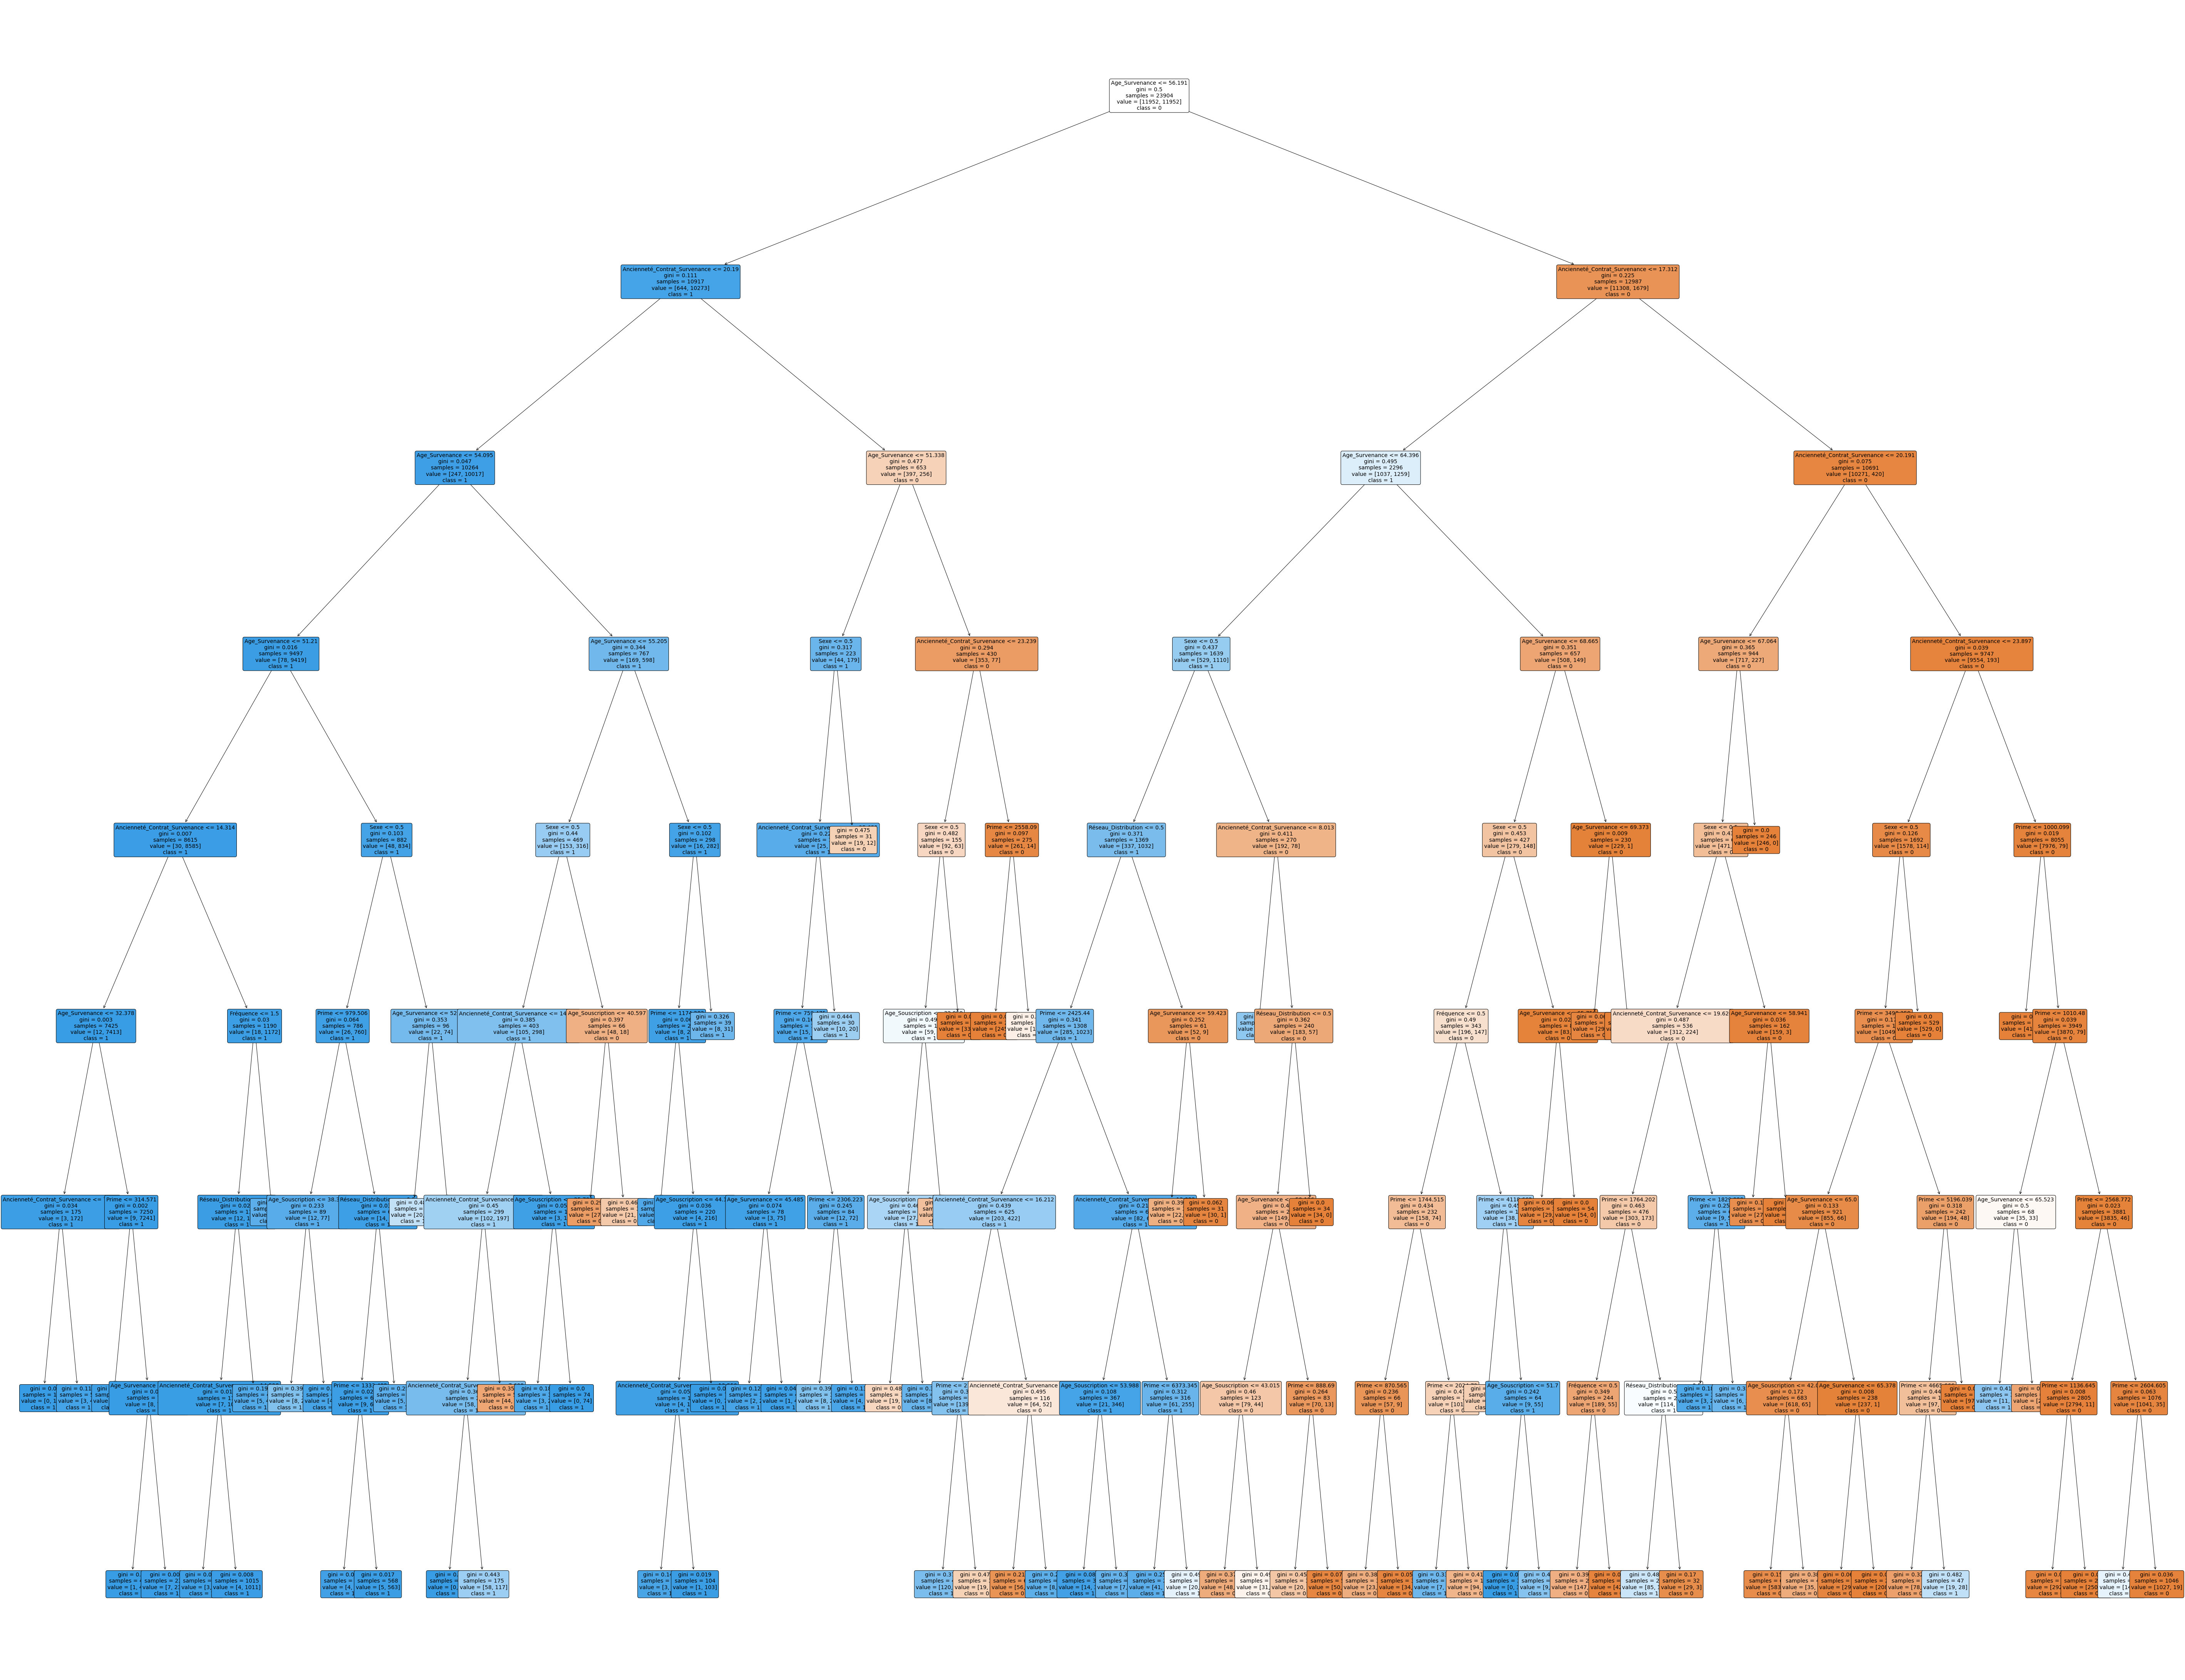

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,80))
a = plot_tree(DT_sm, 
              feature_names=data.drop('Rachat', axis=1).columns,    
              class_names=data['Rachat'].unique().astype(str), 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.savefig('DT_SMOTE.png')

In [82]:
print(DT_sm.feature_importances_)

[0.01838516 0.0021848  0.00631356 0.00228118 0.79123958 0.0216298
 0.15796591]


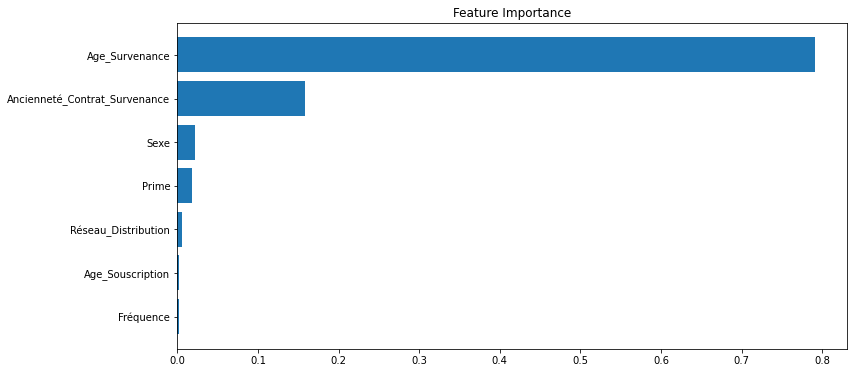

In [83]:
feature_importance = DT_sm.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.savefig('DT_FEATUREIMPORTANCE.png')

### courbe ROC pour les deux modéles DT et DT+SMOTE

In [84]:
from sklearn import metrics
auc_dt = metrics.roc_auc_score(y_test,pred_dt)
auc_dtsm= metrics.roc_auc_score(y_test,pred_dt_sm)

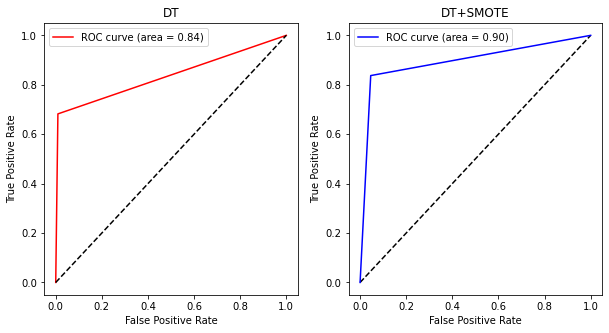

<Figure size 432x288 with 0 Axes>

In [85]:
import matplotlib.pyplot as plt
plt.figure (figsize= (10, 5)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(1, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='red', label="ROC curve (area = %0.2f)" % auc_dt)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('DT')
    plt.legend()
    #plt.show()


fper, tper, thresholds = roc_curve(y_test, pred_dt)
plot_roc_curve(fper, tper)

plt.subplot(1, 2, 2)
# Modify right plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (area = %0.2f)" % auc_dtsm)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('DT+SMOTE')
    plt.legend()
    #plt.show()

fper, tper, thresholds = roc_curve(y_test, pred_dt_sm)
plot_roc_curve(fper, tper)

plt.show()

plt.savefig('roc-dt')

## RONDOM FOREST

**SANS SMOTE**

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rf=RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf= rf.predict(X_test)


In [87]:
# Evaluate
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[5086   13]
 [  83  175]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5099
           1       0.93      0.68      0.78       258

    accuracy                           0.98      5357
   macro avg       0.96      0.84      0.89      5357
weighted avg       0.98      0.98      0.98      5357



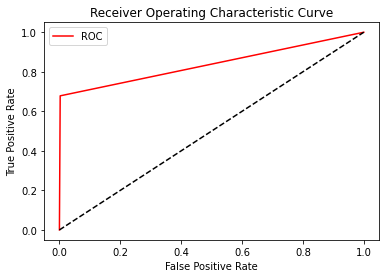

In [88]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
pred_rf = rf.predict(X_test)  

fper, tper, thresholds = roc_curve(y_test, pred_rf)
plot_roc_curve(fper, tper)



**AVEC SMOTE**

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

rfc=RandomForestClassifier(random_state=30)
param_grid = { 
    'n_estimators': [100,200,300,400,500],
    'max_features': [2,3,4,5],
    'max_depth' : [4,5,6,7,8],
   
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=200,
                       random_state=30)

In [90]:
# summarize result
print('Best Score: %s' % CV_rfc.best_score_)
print('Best Hyperparameters: %s' % CV_rfc.best_params_)

Best Score: 0.9851175670268107
Best Hyperparameters: {'max_depth': 8, 'max_features': 2, 'n_estimators': 200}


In [91]:
rf_sm = RandomForestClassifier( max_depth=5, max_features=2,
                       n_estimators=100, random_state=30)
rf_sm.fit(X_train_sm, y_train_sm)
pred_rf_sm = rf_sm.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, pred_rf_sm))
print(classification_report(y_test, pred_rf_sm))

[[4890  209]
 [  45  213]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5099
           1       0.50      0.83      0.63       258

    accuracy                           0.95      5357
   macro avg       0.75      0.89      0.80      5357
weighted avg       0.97      0.95      0.96      5357



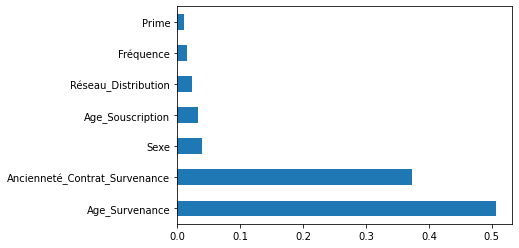

<Figure size 432x288 with 0 Axes>

In [92]:
feat_importances= pd.Series(rf_sm.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
plt.savefig('rfslfeatureimpo.png')

In [93]:
feat_importances.nlargest(10)

Age_Survenance                   0.506856
Ancienneté_Contrat_Survenance    0.372922
Sexe                             0.039108
Age_Souscription                 0.032210
Réseau_Distribution              0.023672
Fréquence                        0.014611
Prime                            0.010620
dtype: float64

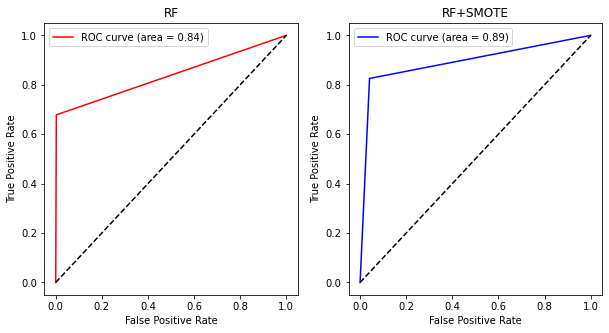

<Figure size 432x288 with 0 Axes>

In [94]:
import matplotlib.pyplot as plt
auc_rf = metrics.roc_auc_score(y_test,pred_rf)
auc_rfsm= metrics.roc_auc_score(y_test,pred_rf_sm)
plt.figure (figsize= (10, 5)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(1, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='red', label="ROC curve (area = %0.2f)" % auc_rf)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RF')
    plt.legend()
    #plt.show()


fper, tper, thresholds = roc_curve(y_test, pred_rf)
plot_roc_curve(fper, tper)

plt.subplot(1, 2, 2)
# Modify right plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (area = %0.2f)" % auc_rfsm)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RF+SMOTE')
    plt.legend()
    #plt.show()

fper, tper, thresholds = roc_curve(y_test, pred_rf_sm)
plot_roc_curve(fper, tper)

plt.show()

plt.savefig('roc-rf')

# XGBOOST

In [109]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate= 0.1,n_estimators= 1000,max_depth= 6)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)


# Evaluate
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


[[5084   15]
 [  76  182]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5099
           1       0.92      0.71      0.80       258

    accuracy                           0.98      5357
   macro avg       0.95      0.85      0.90      5357
weighted avg       0.98      0.98      0.98      5357



In [95]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)


# Evaluate
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


[[5083   16]
 [  76  182]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5099
           1       0.92      0.71      0.80       258

    accuracy                           0.98      5357
   macro avg       0.95      0.85      0.89      5357
weighted avg       0.98      0.98      0.98      5357



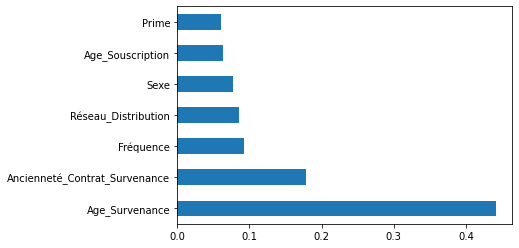

In [96]:
feat_importances_xgb= pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances_xgb.nlargest(10).plot(kind='barh')
plt.show()

In [97]:
feat_importances_xgb.nlargest(10)

Age_Survenance                   0.441954
Ancienneté_Contrat_Survenance    0.178950
Fréquence                        0.092680
Réseau_Distribution              0.085600
Sexe                             0.076955
Age_Souscription                 0.063371
Prime                            0.060490
dtype: float32

In [110]:

xgb.fit(X_train_sm, y_train_sm)
predxgb_sm = xgb.predict(X_test)
# Evaluate
print(confusion_matrix(y_test, predxgb_sm))
print(classification_report(y_test, predxgb_sm))


[[5061   38]
 [  60  198]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5099
           1       0.84      0.77      0.80       258

    accuracy                           0.98      5357
   macro avg       0.91      0.88      0.90      5357
weighted avg       0.98      0.98      0.98      5357



In [111]:

xgb.fit(X_train_enn, y_train_enn)
predxgb_enn= xgb.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, predxgb_enn))
print(classification_report(y_test, predxgb_enn))


[[5004   95]
 [  49  209]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5099
           1       0.69      0.81      0.74       258

    accuracy                           0.97      5357
   macro avg       0.84      0.90      0.86      5357
weighted avg       0.98      0.97      0.97      5357



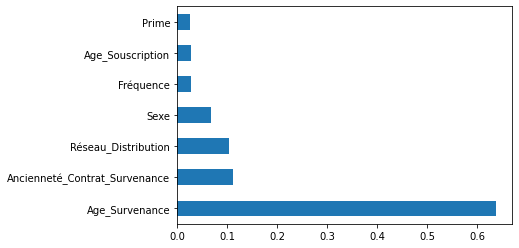

In [100]:
feat_importances_xgb= pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances_xgb.nlargest(10).plot(kind='barh')
plt.show()

In [101]:
feat_importances_xgb.nlargest(10)

Age_Survenance                   0.637427
Ancienneté_Contrat_Survenance    0.112134
Réseau_Distribution              0.102481
Sexe                             0.067196
Fréquence                        0.028297
Age_Souscription                 0.027120
Prime                            0.025345
dtype: float32

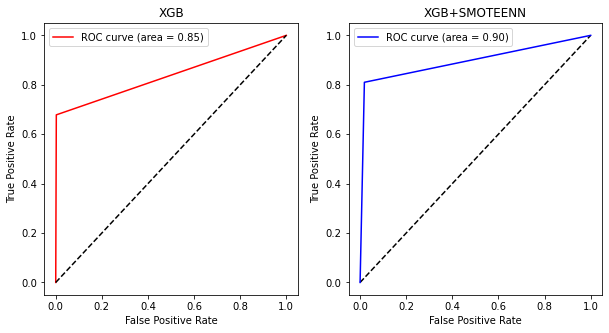

<Figure size 432x288 with 0 Axes>

In [112]:
import matplotlib.pyplot as plt
auc_xgb = metrics.roc_auc_score(y_test,pred_xgb)
auc_xgbenn= metrics.roc_auc_score(y_test,predxgb_enn)
plt.figure (figsize= (10, 5)) 
# Arguments to subplot are (# rows, # cols, index in grid)
plt.subplot(1, 2, 1)
# Modify left plot here
def plot_roc_curve(fper, tper):
    
    plt.plot(fper, tper, color='red', label="ROC curve (area = %0.2f)" % auc_xgb)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGB')
    plt.legend()
    #plt.show()


fper, tper, thresholds = roc_curve(y_test, pred_rf)
plot_roc_curve(fper, tper)

plt.subplot(1, 2, 2)
# Modify right plot here
def plot_roc_curve(fper, tper):
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.plot(fper, tper, color='blue',label="ROC curve (area = %0.2f)" % auc_xgbenn)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGB+SMOTEENN')
    plt.legend()
    #plt.show()

fper, tper, thresholds = roc_curve(y_test, predxgb_enn)
plot_roc_curve(fper, tper)

plt.show()

plt.savefig('roc-xgb.png')